In [1]:
from qiime2 import Artifact

In [2]:
from qiime2.plugins.phylogeny.pipelines import align_to_tree_mafft_fasttree

In [3]:
%%bash
mkdir qiime2-phylogeny-in-action-api
cd qiime2-phylogeny-in-action-api

mkdir: cannot create directory ‘qiime2-phylogeny-in-action-api’: File exists


```shell
qiime tools import \
  --input-path /mnt/d/Lab/TaxaIdentification/16S-out-1.fasta \
  --output-path All-16S.qza \
  --type 'FeatureData[Sequence]'
```

In [4]:
artifact = Artifact.import_data('FeatureData[Sequence]',
                                '/mnt/d/Lab/TaxaIdentification/16S-out-1.fasta'
                                )

In [5]:
mafft_alignment = align_to_tree_mafft_fasttree(artifact, 4 )

Running external command line application. This may print messages to stdout and/or stderr.
The command being run is below. This command cannot be manually re-run as it will depend on temporary files that no longer exist.

Command: mafft --preservecase --inputorder --thread 4 /tmp/qiime2-archive-iutj9pri/d47c89f4-6812-4b69-827c-4c4823c1409e/data/dna-sequences.fasta

Running external command line application. This may print messages to stdout and/or stderr.
The command being run is below. This command cannot be manually re-run as it will depend on temporary files that no longer exist.

Command: FastTreeMP -quote -nt /tmp/qiime2-archive-z2mu74h_/4aa1554f-56ce-4b4f-9953-c66a8485d4ca/data/aligned-dna-sequences.fasta



In [6]:
mafft_alignment

Results (name = value)
------------------------------------------------------------------------------------------------------
alignment        = <artifact: FeatureData[AlignedSequence] uuid: cbdaec48-5add-424c-bba1-fa9ae2756be3>
masked_alignment = <artifact: FeatureData[AlignedSequence] uuid: 98fc4b24-502e-4321-98ce-3caf39fd2e8a>
tree             = <artifact: Phylogeny[Unrooted] uuid: 5bd9ac76-274d-4d9f-aecf-6bfbc1ed8197>
rooted_tree      = <artifact: Phylogeny[Rooted] uuid: 727a0ab5-c435-4a3a-b884-8c06584c0189>

In [7]:
mafft_alignment.tree

<artifact: Phylogeny[Unrooted] uuid: 5bd9ac76-274d-4d9f-aecf-6bfbc1ed8197>

In [12]:
!pwd

/mnt/d/Lab/Qiime2


In [15]:
Artifact.export_data(mafft_alignment.tree, "/mnt/d/Lab/Qiime2/qiime2-phylogeny-api")

In [5]:
trees = "/mnt/d/Lab/Qiime2/qiime2-phylogeny-api/tree.nwk"

In [3]:
from Bio import Phylo

In [6]:
tree = Phylo.read(trees, 'newick')

In [26]:
print(tree)

Tree(rooted=False, weight=1.0)
    Clade()
        Clade(branch_length=0.009439319, confidence=0.816)
            Clade(branch_length=0.056354361, name='DA-31Eubacterium rectale')
            Clade(branch_length=0.011250117, confidence=0.601)
                Clade(branch_length=0.058339626, confidence=1.0)
                    Clade(branch_length=0.077006445, confidence=1.0)
                        Clade(branch_length=0.051390347, name='DA-222 Oscillibacter sp.')
                        Clade(branch_length=0.034556638, name='DA-36 Intestinimonas sp.')
                    Clade(branch_length=0.022391798, confidence=0.954)
                        Clade(branch_length=0.019670882, confidence=0.355)
                            Clade(branch_length=0.050669292, confidence=0.981)
                                Clade(branch_length=0.038830576, confidence=0.939)
                                    Clade(branch_length=0.133566148, name='DA-23 Bifidobacterium adolescentis')
                       

In [7]:
import matplotlib.pyplot as plt

Using matplotlib backend: agg
Populating the interactive namespace from numpy and matplotlib


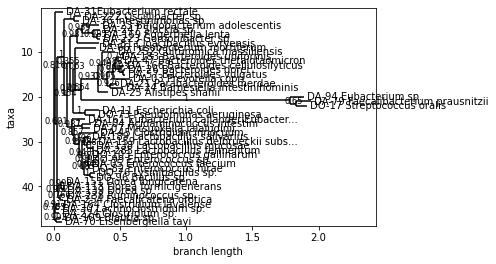

In [8]:
%matplotlib inline
Phylo.draw(tree)

In [9]:
tree.ladderize()

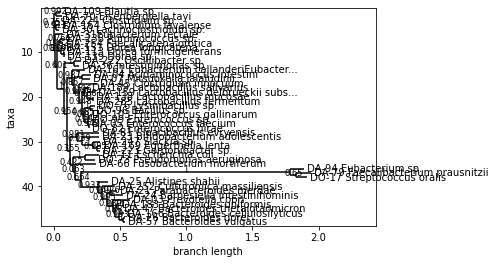

In [37]:
Phylo.draw(tree)

In [ ]:
conda install pygraphviz

In [10]:
tree = Phylo.read(trees, 'newick')

In [11]:
import pylab
%pylab inline
Phylo.draw_graphviz(tree)
pylab.show()

Populating the interactive namespace from numpy and matplotlib


/home/junyu/miniconda3/envs/qiime2-2020.6/lib/python3.6/site-packages/Bio/Phylo/_utils.py:155: BiopythonDeprecationWarning: draw_graphviz is deprecated; use Bio.Phylo.draw instead
  BiopythonDeprecationWarning,


AttributeError: 'Graph' object has no attribute 'node'

In [43]:
Phylo.draw_ascii(tree)

 , DA-31Eubacterium rectale
 |
 | , DA-222 Oscillibacter sp.
 |,|
 ||| DA-36 Intestinimonas sp.
 ||
 ||  _ DA-23 Bifidobacterium adolescentis
 ||,|
 |||| , DA-247 Slackia sp.
 ||||_|
 |||  , DA-169 Eggerthella lenta
 |||  |
 |||  | DA-223 Gordonibacter sp.
 |||
 |||__ DA-81 Cloacibacillus evryensis
 |||
 |||__ DA-66 Fusobacterium mortiferum
 |||
 |||   , DA-252 Culturomica massiliensis
 ,||   |
 |||   | , DA-183 Bacteroides uniformis
 |||   |,|
 |,|   ||| DA-47 Bacteroides thetaiotaomicron
 |||  ,||
 |||  |||, DA-166 Bacteroides cellulosilyticus
 |||  ||||
 |||  |,|, DA-26 Bacteroides dorei
 |||  ||||
 |||  |||| DA-57 Bacteroides vulgatus
 ||| _|||
 |||| |||_ DA-03 Prevotella copri
 |||| ||
 |||| ||, DA-21 Parabacteroides merdae
 |||| |||
 |||| | | DA-24 Barnesiella intestinihominis
 |||| |
 |||| | DA-25 Alistipes shahii
 ||||
 ||||                          , DA-94 Eubacterium sp.
 ||||__________________________|
 |||                           | _ DA-79 Faecalibacterium prausnitzii
 ||